<a href="https://colab.research.google.com/github/Thasneem-vazim/Lab-programs-sem-2/blob/main/Experiments_with_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.express as px
np.random.seed(13)
file=pd.read_csv("/content/Copy of Survey (Responses) - Form Responses 1 (2).csv")
x=file[["1) Sadness","2) Discouragement","3) Low self-esteem","4) Inferiority","5) Guilt","6) Indecisiveness","7) Irritability","8) Loss of interest in life","9) Loss of motivation","10) Poor self-image","11) Appetite changes","12) Sleep changes","13) Loss of positivity","14) Hypochondriasis","15) Suicidal impulses"]]

y=file["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
x = tsne.fit_transform(x) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 206 samples in 0.001s...
[t-SNE] Computed neighbors for 206 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 206 / 206
[t-SNE] Mean sigma: 1.482303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.215485
[t-SNE] KL divergence after 1000 iterations: 0.783151


In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[4],activation='linear')])
decoder = keras.models.Sequential([keras.layers.Dense(4, input_shape=[2],activation='linear')])
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()
 
#

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 2)                 10        
                                                                 
 sequential_4 (Sequential)   (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss="mse", optimizer='adam')
 

 

In [ ]:
history_ae = autoencoder.fit(x_train,x_train,epochs=50)
 

Epoch 1/50


ValueError: ignored

In [ ]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)

SVC()

In [ ]:
prediction=SVM.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  91.2621359223301


                       precision    recall  f1-score   support

Borderline depression       0.79      1.00      0.88        22
      Mild depression       0.95      0.95      0.95        37
  Moderate depression       0.97      0.94      0.95        32
        No depression       1.00      0.43      0.60         7
    Severe depression       1.00      0.80      0.89         5

             accuracy                           0.91       103
            macro avg       0.94      0.82      0.85       103
         weighted avg       0.92      0.91      0.91       103



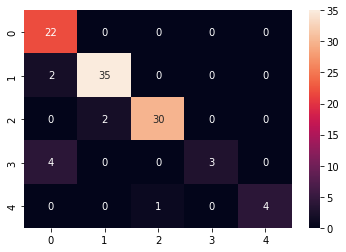

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y1_predict_test=SVM.predict(x_test)
cm1=confusion_matrix(y_test,y1_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)
print(classification_report(y_test,y1_predict_test))

In [ ]:
print(classification_report(y_test,y1_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.79      1.00      0.88        22
      Mild depression       0.95      0.95      0.95        37
  Moderate depression       0.97      0.94      0.95        32
        No depression       1.00      0.43      0.60         7
    Severe depression       1.00      0.80      0.89         5

             accuracy                           0.91       103
            macro avg       0.94      0.82      0.85       103
         weighted avg       0.92      0.91      0.91       103



                       precision    recall  f1-score   support

Borderline depression       0.57      0.55      0.56        22
      Mild depression       0.59      0.46      0.52        37
  Moderate depression       0.63      0.69      0.66        32
        No depression       0.46      0.86      0.60         7
    Severe depression       0.60      0.60      0.60         5

             accuracy                           0.58       103
            macro avg       0.57      0.63      0.59       103
         weighted avg       0.59      0.58      0.58       103



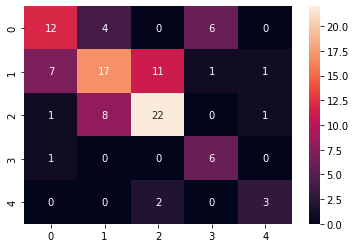

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)
y4_predict_test=DT.predict(x_test)
cm4=confusion_matrix(y_test,y4_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y4_predict_test))

In [ ]:
prediction=DT.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  58.252427184466015


In [ ]:
print(classification_report(y_test,y4_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.57      0.55      0.56        22
      Mild depression       0.59      0.46      0.52        37
  Moderate depression       0.63      0.69      0.66        32
        No depression       0.46      0.86      0.60         7
    Severe depression       0.60      0.60      0.60         5

             accuracy                           0.58       103
            macro avg       0.57      0.63      0.59       103
         weighted avg       0.59      0.58      0.58       103



In [ ]:
prediction=DT.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  58.252427184466015


                       precision    recall  f1-score   support

Borderline depression       0.74      0.77      0.76        22
      Mild depression       0.79      0.81      0.80        37
  Moderate depression       0.87      0.84      0.86        32
        No depression       0.71      0.71      0.71         7
    Severe depression       1.00      0.80      0.89         5

             accuracy                           0.81       103
            macro avg       0.82      0.79      0.80       103
         weighted avg       0.81      0.81      0.81       103



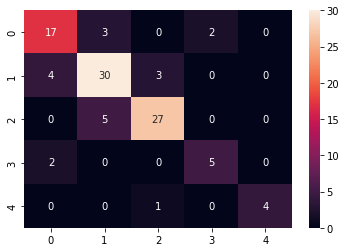

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(x_train, y_train)
y5_predict_test=RF.predict(x_test)
cm4=confusion_matrix(y_test,y5_predict_test)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y5_predict_test))

In [ ]:
prediction=RF.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  80.58252427184466


                       precision    recall  f1-score   support

Borderline depression       0.55      0.55      0.55        22
      Mild depression       0.72      0.70      0.71        37
  Moderate depression       0.89      0.78      0.83        32
        No depression       0.42      0.71      0.53         7
    Severe depression       1.00      1.00      1.00         5

             accuracy                           0.71       103
            macro avg       0.72      0.75      0.72       103
         weighted avg       0.73      0.71      0.72       103



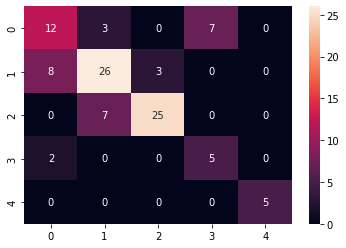

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y6_pred=knn.predict(x_test)
cm4=confusion_matrix(y_test,y6_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,y6_pred))


In [ ]:
prediction=knn.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  70.87378640776699


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

Borderline depression       1.00      0.05      0.09        22
      Mild depression       0.43      0.89      0.58        37
  Moderate depression       0.64      0.50      0.56        32
        No depression       0.00      0.00      0.00         7
    Severe depression       0.00      0.00      0.00         5

             accuracy                           0.49       103
            macro avg       0.41      0.29      0.25       103
         weighted avg       0.57      0.49      0.40       103



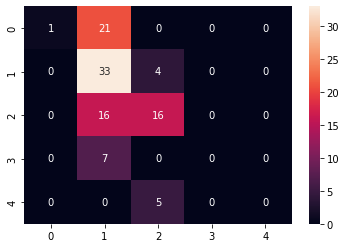

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'binary:logistic',
 'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.05,
 'learning_rate': 0.03,
 'n_estimators':1484,'seed': 27
 }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train,y_train)

yxg_pred=xgb_clf.predict(x_test)
cm4=confusion_matrix(y_test,yxg_pred)
sns.heatmap(cm4,annot=True)
print(classification_report(y_test,yxg_pred))

In [ ]:
prediction=xgb_clf.predict(x_test)
print('Accuracy = ', metrics.accuracy_score(y_test, prediction)*100)

Accuracy =  48.54368932038835
